#Imports

In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

np.random.seed(0)

#Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualise Examples

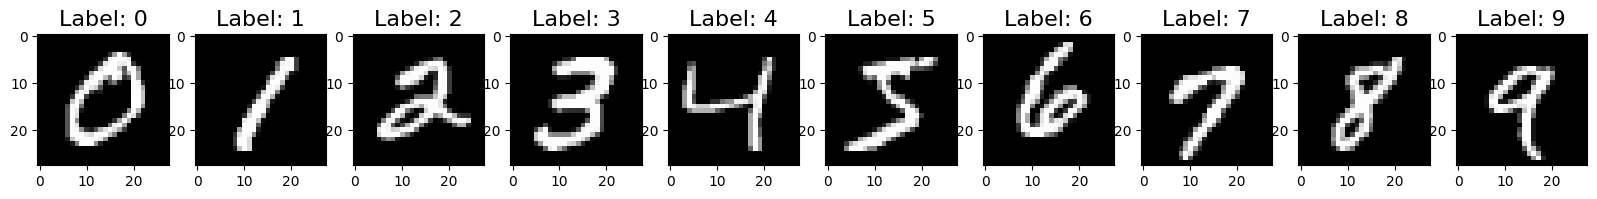

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20,20))

for i in range(0, num_classes):
  sample = x_train[y_train==i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Data Preparation

In [8]:
#Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
#Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Create Model - Fully Connected Neural Network

In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape = (784,), activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

#Train

In [11]:
batch_size = 516
epochs = 10
model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6859 - loss: 1.0690
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9286 - loss: 0.2468
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9471 - loss: 0.1813
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9614 - loss: 0.1377
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9676 - loss: 0.1093
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9731 - loss: 0.0903
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9760 - loss: 0.0809
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9784 - loss: 0.0700
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9810 - loss: 0.0595
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9843 - loss: 0.0518


#Evaluate

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.0907
Test Loss: 0.07645910978317261, Test Accuracy: 0.9771999716758728


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
[[7.64046945e-07 1.56133069e-06 4.72746469e-05 ... 9.99250770e-01
  6.28379382e-07 6.05290870e-06]
 [1.03292976e-07 1.29638705e-04 9.99857664e-01 ... 5.23189581e-09
  2.74451691e-06 1.54922908e-09]
 [5.42252155e-06 9.98931348e-01 1.18363627e-04 ... 4.52777109e-04
  1.84083226e-04 1.93353808e-05]
 ...
 [6.04582107e-10 1.24173933e-08 5.35496994e-11 ... 1.30372177e-06
  5.48729020e-07 1.45880540e-05]
 [2.08943064e-07 2.47643630e-08 6.77876366e-10 ... 1.38953116e-08
  9.16829740e-05 7.30139549e-09]
 [1.19820864e-08 2.73257861e-10 7.71773490e-09 ... 1.41205819e-12
  6.20798274e-11 2.92101655e-11]]
[7 2 1 ... 4 5 6]


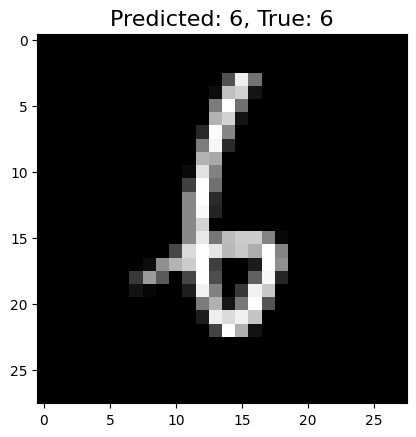

In [14]:
#Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

#Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix:')

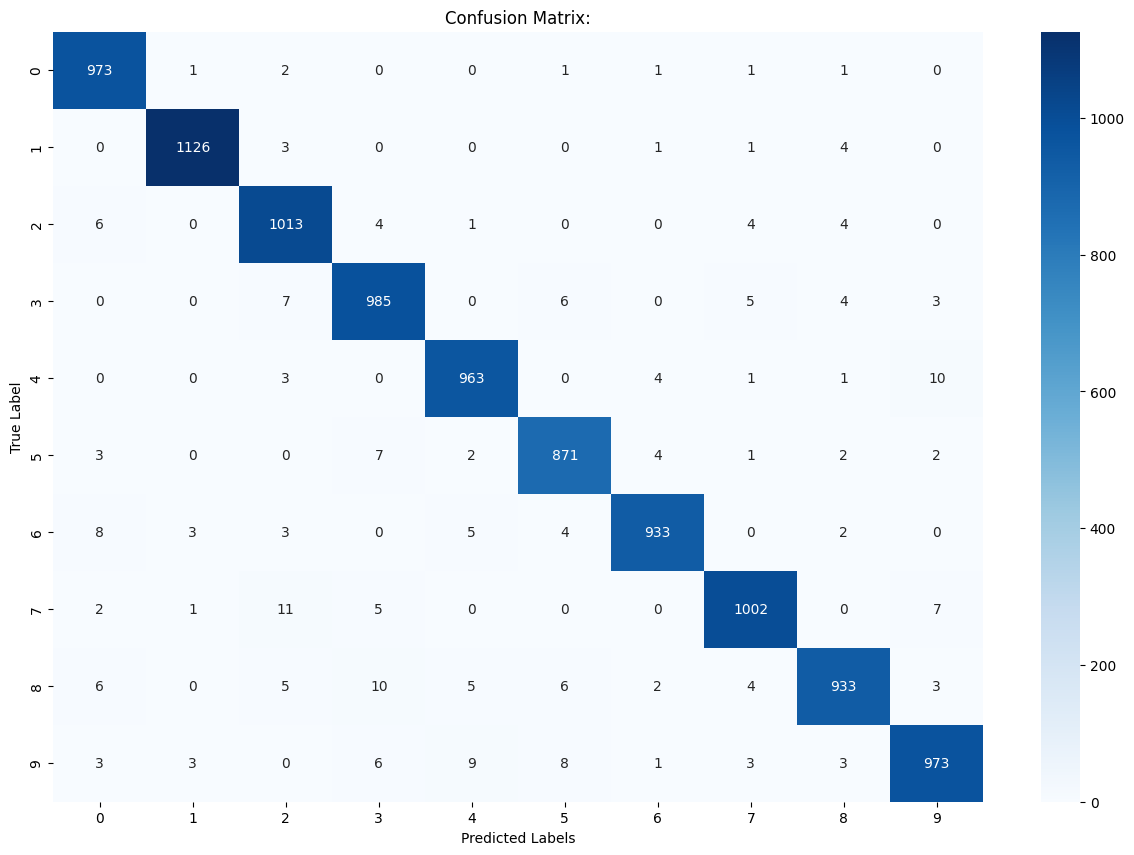

In [15]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix:')

#Investigate some errors

In [18]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [19]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis =1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get list of indices of sorted differences

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

In [25]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

Error in callback <function flush_figures at 0x79643497e7a0> (for post_execute):


KeyboardInterrupt: 